# To Do:

* Finish code annotations
* Add cross validation scores
* Save figures for visual plots
* Review logic and order of flow

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('../Final_Combined_DF_v2.csv')
df.head()

,Unnamed: 0,Name,Year,School,G,MP,FG,FGA,FG%,2P,...,PF,NBATM,NBAPTS,NBATRB,NBAAST,NBASTL,NBABLK,NBATOV,Pick,Position
0,0,Kenyon Martin,2001,Cincinnati,31,29.3,7.1,12.5,0.568,7.1,...,2.3,NJN,12.0,7.4,1.9,1.1,1.7,2.0,1,PF
1,1,Stromile Swift,2001,LSU,34,29.8,6.1,10.1,0.608,5.9,...,2.6,VAN,4.9,3.6,0.4,0.8,1.0,0.8,2,PF
2,2,Marcus Fizer,2001,Iowa State,37,33.6,8.8,15.2,0.582,8.4,...,2.8,CHI,9.5,4.3,1.1,0.4,0.3,1.7,4,PF
3,3,Mike Miller,2001,Florida,37,28.6,4.7,9.9,0.476,3.5,...,1.9,ORL,11.9,4.0,1.7,0.6,0.2,1.2,5,SF
4,4,DerMarr Johnson,2001,Cincinnati,32,27.5,4.4,9.2,0.478,2.8,...,2.0,ATL,5.1,2.3,0.8,0.6,0.4,1.2,6,SF


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 34 columns):
Unnamed: 0    718 non-null int64
Name          718 non-null object
Year          718 non-null int64
School        718 non-null object
G             718 non-null int64
MP            718 non-null float64
FG            718 non-null float64
FGA           718 non-null float64
FG%           718 non-null float64
2P            718 non-null float64
2PA           718 non-null float64
2P%           718 non-null float64
3P            718 non-null float64
3PA           718 non-null float64
3P%           718 non-null float64
FT            718 non-null float64
FTA           718 non-null float64
FT%           718 non-null float64
PTS           718 non-null float64
TRB           718 non-null float64
AST           718 non-null float64
STL           718 non-null float64
BLK           718 non-null float64
TOV           718 non-null float64
PF            718 non-null float64
NBATM         718 non-null o

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df1 = df.replace('C-', 'C')
#positions = df.Pos.unique()
#po_dict = dict(zip(positions, range(len(positions))))
#df1 = df.replace({'Pos': po_dict})
teams = df.NBATM.unique()
te_dict = dict(zip(teams, range(len(teams))))
df1 = df1.replace({'NBATM': te_dict})
df1.head()

,Name,Year,School,G,MP,FG,FGA,FG%,2P,2PA,...,PF,NBATM,NBAPTS,NBATRB,NBAAST,NBASTL,NBABLK,NBATOV,Pick,Position
0,Kenyon Martin,2001,Cincinnati,31,29.3,7.1,12.5,0.568,7.1,12.3,...,2.3,0,12.0,7.4,1.9,1.1,1.7,2.0,1,PF
1,Stromile Swift,2001,LSU,34,29.8,6.1,10.1,0.608,5.9,9.3,...,2.6,1,4.9,3.6,0.4,0.8,1.0,0.8,2,PF
2,Marcus Fizer,2001,Iowa State,37,33.6,8.8,15.2,0.582,8.4,14.1,...,2.8,2,9.5,4.3,1.1,0.4,0.3,1.7,4,PF
3,Mike Miller,2001,Florida,37,28.6,4.7,9.9,0.476,3.5,6.2,...,1.9,3,11.9,4.0,1.7,0.6,0.2,1.2,5,SF
4,DerMarr Johnson,2001,Cincinnati,32,27.5,4.4,9.2,0.478,2.8,4.8,...,2.0,4,5.1,2.3,0.8,0.6,0.4,1.2,6,SF


In [5]:
# Amend column name to avoid duplicate column names
df1['Fouls'] = df1['PF']
df1 = df1.drop(['PF'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 33 columns):
Name        718 non-null object
Year        718 non-null int64
School      718 non-null object
G           718 non-null int64
MP          718 non-null float64
FG          718 non-null float64
FGA         718 non-null float64
FG%         718 non-null float64
2P          718 non-null float64
2PA         718 non-null float64
2P%         718 non-null float64
3P          718 non-null float64
3PA         718 non-null float64
3P%         718 non-null float64
FT          718 non-null float64
FTA         718 non-null float64
FT%         718 non-null float64
PTS         718 non-null float64
TRB         718 non-null float64
AST         718 non-null float64
STL         718 non-null float64
BLK         718 non-null float64
TOV         718 non-null float64
NBATM       718 non-null int64
NBAPTS      718 non-null float64
NBATRB      718 non-null float64
NBAAST      718 non-null float64
NBASTL      

In [6]:
# Dummify player positions
dum1 = pd.get_dummies(df1['Position'])
df1 = pd.concat([df1, dum1], axis=1)
df1 = df1.drop(['Position'], axis=1)
df1.head()

,Name,Year,School,G,MP,FG,FGA,FG%,2P,2PA,...,NBASTL,NBABLK,NBATOV,Pick,Fouls,C,PF,PG,SF,SG
0,Kenyon Martin,2001,Cincinnati,31,29.3,7.1,12.5,0.568,7.1,12.3,...,1.1,1.7,2.0,1,2.3,0,1,0,0,0
1,Stromile Swift,2001,LSU,34,29.8,6.1,10.1,0.608,5.9,9.3,...,0.8,1.0,0.8,2,2.6,0,1,0,0,0
2,Marcus Fizer,2001,Iowa State,37,33.6,8.8,15.2,0.582,8.4,14.1,...,0.4,0.3,1.7,4,2.8,0,1,0,0,0
3,Mike Miller,2001,Florida,37,28.6,4.7,9.9,0.476,3.5,6.2,...,0.6,0.2,1.2,5,1.9,0,0,0,1,0
4,DerMarr Johnson,2001,Cincinnati,32,27.5,4.4,9.2,0.478,2.8,4.8,...,0.6,0.4,1.2,6,2.0,0,0,0,1,0


In [7]:
# POSSIBLY REMOVE
schoolnames = df1.School.unique()
sc_dict = dict(zip(schoolnames, range(len(schoolnames))))
df1 = df1.replace({'School': sc_dict})
df1.head()

,Name,Year,School,G,MP,FG,FGA,FG%,2P,2PA,...,NBASTL,NBABLK,NBATOV,Pick,Fouls,C,PF,PG,SF,SG
0,Kenyon Martin,2001,0,31,29.3,7.1,12.5,0.568,7.1,12.3,...,1.1,1.7,2.0,1,2.3,0,1,0,0,0
1,Stromile Swift,2001,1,34,29.8,6.1,10.1,0.608,5.9,9.3,...,0.8,1.0,0.8,2,2.6,0,1,0,0,0
2,Marcus Fizer,2001,2,37,33.6,8.8,15.2,0.582,8.4,14.1,...,0.4,0.3,1.7,4,2.8,0,1,0,0,0
3,Mike Miller,2001,3,37,28.6,4.7,9.9,0.476,3.5,6.2,...,0.6,0.2,1.2,5,1.9,0,0,0,1,0
4,DerMarr Johnson,2001,0,32,27.5,4.4,9.2,0.478,2.8,4.8,...,0.6,0.4,1.2,6,2.0,0,0,0,1,0


In [8]:
# Remove school from dataset and set "Name" to index
df1 = df1.drop(['School'], axis=1)
df1 = df1.set_index('Name')
df1.head()

,Year,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,NBASTL,NBABLK,NBATOV,Pick,Fouls,C,PF,PG,SF,SG
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,2001,31,29.3,7.1,12.5,0.568,7.1,12.3,0.573,0.1,...,1.1,1.7,2.0,1,2.3,0,1,0,0,0
Stromile Swift,2001,34,29.8,6.1,10.1,0.608,5.9,9.3,0.634,0.2,...,0.8,1.0,0.8,2,2.6,0,1,0,0,0
Marcus Fizer,2001,37,33.6,8.8,15.2,0.582,8.4,14.1,0.600,0.4,...,0.4,0.3,1.7,4,2.8,0,1,0,0,0
Mike Miller,2001,37,28.6,4.7,9.9,0.476,3.5,6.2,0.559,1.3,...,0.6,0.2,1.2,5,1.9,0,0,0,1,0
DerMarr Johnson,2001,32,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,...,0.6,0.4,1.2,6,2.0,0,0,0,1,0


In [9]:
# Move NBA stat columns to the end of the data frame
cols_at_end = ['NBATOV','NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
df1.head()

,Year,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,PF,PG,SF,SG,NBATOV,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,2001,31,29.3,7.1,12.5,0.568,7.1,12.3,0.573,0.1,...,1,0,0,0,2.0,7.4,1.9,1.1,1.7,12.0
Stromile Swift,2001,34,29.8,6.1,10.1,0.608,5.9,9.3,0.634,0.2,...,1,0,0,0,0.8,3.6,0.4,0.8,1.0,4.9
Marcus Fizer,2001,37,33.6,8.8,15.2,0.582,8.4,14.1,0.600,0.4,...,1,0,0,0,1.7,4.3,1.1,0.4,0.3,9.5
Mike Miller,2001,37,28.6,4.7,9.9,0.476,3.5,6.2,0.559,1.3,...,0,0,1,0,1.2,4.0,1.7,0.6,0.2,11.9
DerMarr Johnson,2001,32,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,...,0,0,1,0,1.2,2.3,0.8,0.6,0.4,5.1


In [10]:
# NEED INPUT HERE
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['NBATRB','NBAAST','NBASTL','NBABLK']
for du in dum:
    cols.remove(du)

In [11]:
# Transform/Standardize feature data using Standard Scaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

sc2 = StandardScaler()
for col in cols:
    df1[[col]] = sc2.fit_transform(df1[[col]])
sc3 = StandardScaler()
df1[['NBABLK']] = sc3.fit_transform(df1[['NBABLK']])
sc4 = StandardScaler()
df1[['NBASTL']] = sc4.fit_transform(df1[['NBASTL']])
sc5 = StandardScaler()
df1[['NBAAST']] = sc5.fit_transform(df1[['NBAAST']])
sc6 = StandardScaler()
df1[['NBATRB']] = sc6.fit_transform(df1[['NBATRB']])
#sc7 = StandardScaler()
#df1[['NBATOV']] = sc7.fit_transform(df1[['NBATOV']])
df1.head()

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\si

,Year,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,PF,PG,SF,SG,NBATOV,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,-1.728846,-0.479510,-0.416491,1.111772,0.360329,1.194641,1.917621,1.592380,0.785754,-1.117664,...,1.845239,-0.511725,-0.461344,-0.552679,1.684929,2.619629,0.580542,1.668575,4.150252,1.645453
Stromile Swift,-1.728846,0.158061,-0.303816,0.397644,-0.422276,1.831985,1.066267,0.390984,1.850293,-1.010880,...,1.845239,-0.511725,-0.461344,-0.552679,-0.067104,0.616716,-0.540972,0.885544,2.092526,-0.068416
Marcus Fizer,-1.728846,0.795631,0.552518,2.325790,1.240761,1.417712,2.839921,2.313217,1.256943,-0.797312,...,1.845239,-0.511725,-0.461344,-0.552679,1.246921,0.985673,-0.017598,-0.158496,0.034800,1.041978
Mike Miller,-1.728846,0.795631,-0.574237,-0.602135,-0.487494,-0.271248,-0.636440,-0.850459,0.541433,0.163746,...,-0.541935,-0.511725,2.167582,-0.552679,0.516907,0.827549,0.431007,0.363524,-0.259160,1.621314
DerMarr Johnson,-1.728846,-0.266986,-0.822122,-0.816374,-0.715754,-0.239381,-1.133063,-1.411110,0.820657,0.484098,...,-0.541935,-0.511725,2.167582,-0.552679,0.516907,-0.068491,-0.241901,0.363524,0.328761,-0.020138


In [12]:
# Separate 2019 rookies from train/test data
df3 = df1[0:673]
df4 = df1[673:]
df3.tail()

,Year,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,PF,PG,SF,SG,NBATOV,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Chimezie Metu,1.414599,0.158061,-0.033395,0.326231,0.034244,0.477630,0.924375,0.831495,0.349467,-0.797312,...,1.845239,-0.511725,-0.461344,-0.552679,-0.505113,-0.648282,-0.540972,-0.680517,-0.553121,-0.816725
Alize Johnson,1.414599,-0.054463,0.011676,-0.245071,0.229895,-1.004193,-0.281710,-0.249761,-0.208980,0.056961,...,1.845239,-0.511725,-0.461344,-0.552679,-1.235127,-0.542865,-0.765274,-0.941527,-0.259160,-1.033976
Thomas Welsh,1.414599,-0.054463,0.462377,-0.459310,-0.422276,-0.127846,-0.636440,-0.650226,-0.017014,0.270530,...,-0.541935,-0.511725,-0.461344,-0.552679,-1.089124,-1.069948,-0.466204,-1.202537,-0.847082,-0.865003
George King,1.414599,-0.266986,-0.596772,-0.816374,-0.454885,-0.765189,-1.345902,-1.290971,-0.592912,0.804450,...,-0.541935,-0.511725,2.167582,-0.552679,-1.235127,-0.753698,-0.840042,-1.202537,-0.847082,-1.251227
Kostas Antetokounmpo,1.414599,-0.904556,-3.616473,-2.530281,-2.574442,1.290243,-1.771579,-2.131948,2.146968,-1.117664,...,1.845239,-0.511725,-0.461344,-0.552679,-0.505113,-1.017240,-0.840042,1.407565,-0.847082,-1.009837


In [13]:
# Split training and testing data sets
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [30], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [30], axis=1)
test_x=tests[0]
test_y=tests[1]

In [14]:
test_x

,Year,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,TOV,NBATM,Pick,Fouls,C,PF,PG,SF,SG,NBATOV
Name,,,,,,,,,,,,,,,,,,,,,
Frank Kaminsky,0.890691,1.220678,0.552518,0.897534,0.360329,0.860036,0.995321,0.631263,0.925365,-0.049823,...,-0.968798,1.966155,-1.080628,-1.273267,2.326094,-0.541935,-0.511725,-0.461344,-0.552679,-0.213107
Justise Winslow,0.890691,1.220678,-0.461561,-0.816374,-0.748362,-0.111912,-0.778333,-0.810412,-0.208980,0.056961,...,-0.686723,0.184956,-1.020402,1.002421,-0.429905,-0.541935,-0.511725,2.167582,-0.552679,0.516907
Myles Turner,0.890691,0.158061,-2.016482,-1.530502,-1.237491,-0.605853,-1.062117,-1.050692,-0.261335,-0.690528,...,-1.250873,0.877645,-0.960176,0.174898,2.326094,-0.541935,-0.511725,-0.461344,-0.552679,0.370904
Trey Lyles,0.890691,0.583107,-1.836201,-1.601914,-1.530968,-0.080045,-0.920225,-0.970599,0.140049,-1.117664,...,-1.673985,1.174511,-0.899950,-1.480148,-0.429905,1.845239,-0.511725,-0.461344,-0.552679,-0.067104
Cameron Payne,0.890691,0.370584,0.237026,1.040359,1.273369,-0.589920,0.143967,0.270844,-0.261335,1.338371,...,0.300539,1.669289,-0.779498,-0.445744,-0.429905,-0.541935,1.954173,-0.461344,-0.552679,-0.067104
Kelly Oubre,0.890691,0.583107,-2.286903,-1.744740,-1.465751,-0.781123,-1.629686,-1.611343,-0.540558,-0.263391,...,-1.532948,-0.903555,-0.719272,-0.652625,-0.429905,-0.541935,-0.511725,2.167582,-0.552679,-0.505113
Terry Rozier,0.890691,0.583107,0.868009,0.254818,1.012501,-1.306931,0.143967,0.711356,-1.256068,0.163746,...,-0.122573,0.778689,-0.659046,-1.273267,-0.429905,-0.541935,1.954173,-0.461344,-0.552679,-0.505113
Rashad Vaughn,0.890691,-2.179697,0.259561,0.540470,0.947284,-0.860791,-0.352656,-0.089575,-0.819782,1.231587,...,-0.122573,-1.101466,-0.598821,-0.031983,-0.429905,-0.541935,-0.511725,-0.461344,1.809367,-0.651116
Sam Dekker,0.890691,1.433201,-0.033395,-0.173658,-0.389668,0.509497,-0.210763,-0.770366,1.937551,0.163746,...,-1.956060,-0.606688,-0.538595,-2.514552,-0.429905,1.845239,-0.511725,-0.461344,-0.552679,-1.235127


In [15]:
#Adjusted R-squared formula for the number of predictors in the model
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

# Correlation Matrix

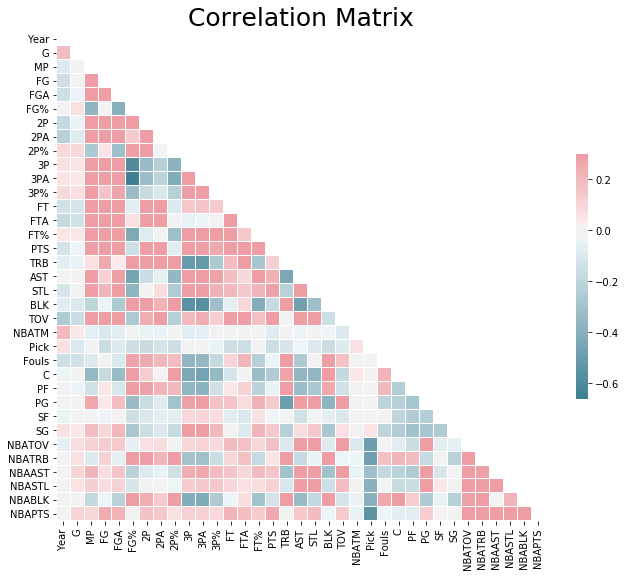

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df3.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax.set_title("Correlation Matrix", fontsize=25)

sns_plot = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5})
# sns_plot.get_figure().savefig("../../static/images/correlation_matrix.png")

# Feature Selection

In [18]:
# Recursive feature elimination using a linear regression model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, 30)
reg = rfe.fit(train_x.values, train_y.NBAPTS.values)

In [19]:
# NEED INPUT HERE

cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
picks = []
for x in range(0,30):
    if reg.support_[x]:
        picks.append(cols[x])
train_x=train_x[picks]
test_x=test_x[picks]
train_x.head()

,Year,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,TOV,NBATM,Pick,Fouls,C,PF,PG,SF,SG,NBATOV
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,-1.728846,-0.479510,-0.416491,1.111772,0.360329,1.194641,1.917621,1.592380,0.785754,-1.117664,...,-0.686723,-1.695199,-1.562436,-0.031983,-0.429905,1.845239,-0.511725,-0.461344,-0.552679,1.684929
Stromile Swift,-1.728846,0.158061,-0.303816,0.397644,-0.422276,1.831985,1.066267,0.390984,1.850293,-1.010880,...,0.159502,-1.596244,-1.502210,0.588659,-0.429905,1.845239,-0.511725,-0.461344,-0.552679,-0.067104
Marcus Fizer,-1.728846,0.795631,0.552518,2.325790,1.240761,1.417712,2.839921,2.313217,1.256943,-0.797312,...,-0.263610,-1.497288,-1.381758,1.002421,-0.429905,1.845239,-0.511725,-0.461344,-0.552679,1.246921
Mike Miller,-1.728846,0.795631,-0.574237,-0.602135,-0.487494,-0.271248,-0.636440,-0.850459,0.541433,0.163746,...,-0.545685,-1.398333,-1.321532,-0.859506,-0.429905,-0.541935,-0.511725,2.167582,-0.552679,0.516907
DerMarr Johnson,-1.728846,-0.266986,-0.822122,-0.816374,-0.715754,-0.239381,-1.133063,-1.411110,0.820657,0.484098,...,-1.250873,-1.299377,-1.261306,-0.652625,-0.429905,-0.541935,-0.511725,2.167582,-0.552679,0.516907


# Linear Regression

In [20]:
# Benchmark model
reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)

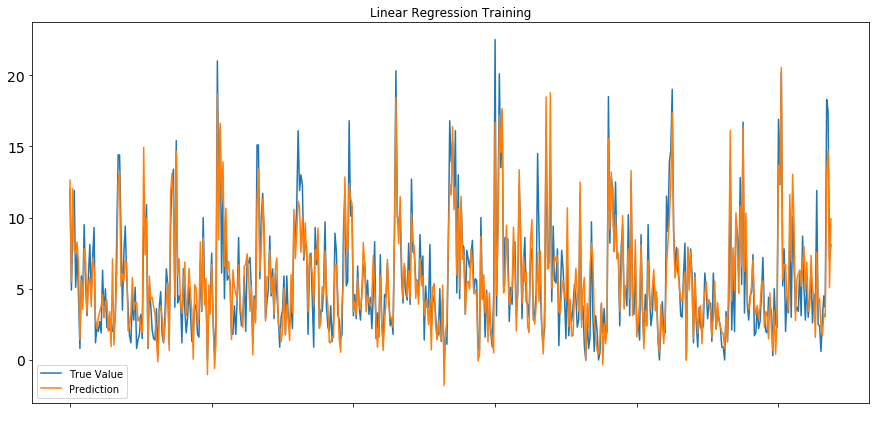

adj train r^2 = 0.8001515141767852
train mse = 3.098244098527263


In [21]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.xlabel(" ")
# plt.savefig('../../static/images/linear_regression_train.png')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

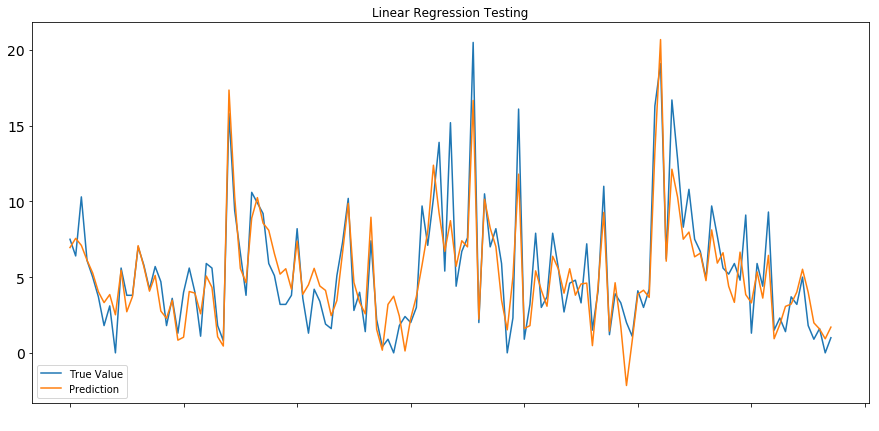

adj test r^2 = 0.7901487217666312
test mse = 3.2218358411412553


In [22]:
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.xlabel(" ")
# plt.savefig('../../static/images/linear_regression_test.png')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

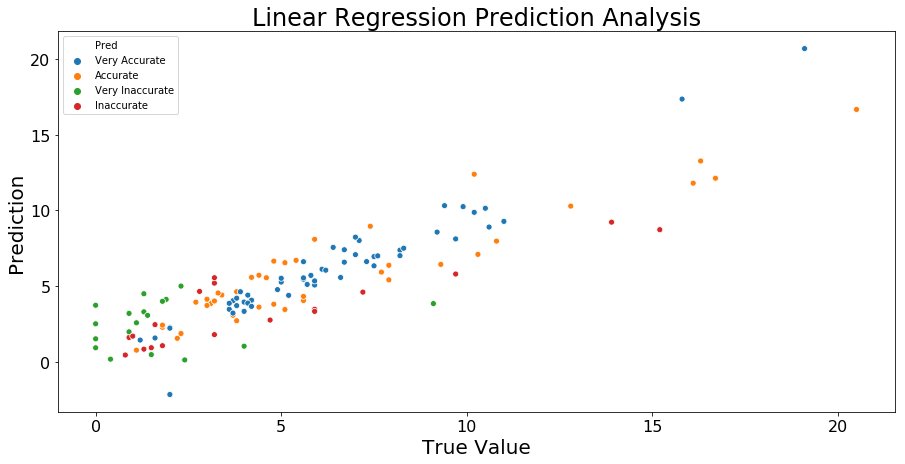

This model is able to relatively accurately predict 30.37% of NBA Rookies.
This model is able to very accurately predict 40.74% of NBA Rookies.


In [23]:
import seaborn as sns
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Linear Regression Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
# plt.savefig('../../static/images/linear_regression_prediction.png')
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


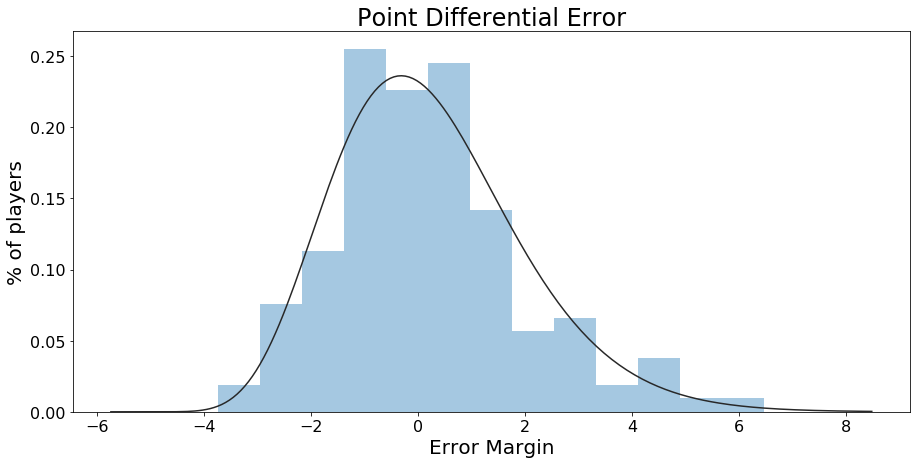

This model is able to relatively accurately predict 77.78% of NBA Rookies within 2 points.


In [24]:
from scipy import stats
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

In [25]:
# Create a separate train-test split for cross validation
from sklearn.model_selection import cross_val_score
cross_x = train_x.append(test_x, ignore_index = True)
cross_y = train_y.append(test_y, ignore_index = True)
cross_x = cross_x.set_index(df3.index)
cross_y = cross_y.set_index(df3.index)
cvs = cross_val_score(reg, cross_x, cross_y.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))

The Cross Validation Score is 78.45


# Random Forrest

In [26]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.NBAPTS.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

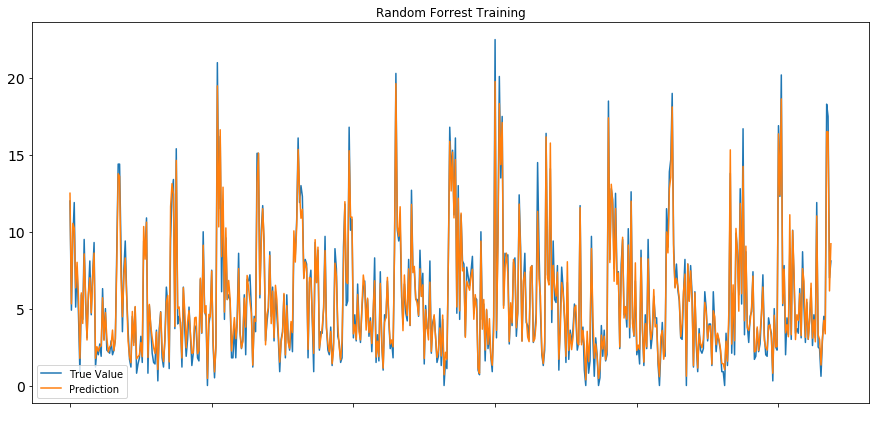

adj train r^2 = 0.967691174125491
train mse = 0.5008825995539008


In [27]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.xlabel(" ")
# plt.savefig('../../static/images/random_forrest_train.png')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

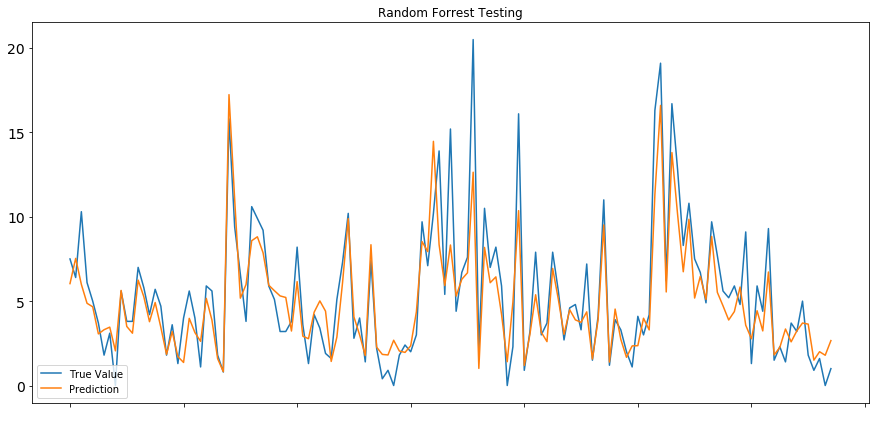

adj test r^2 = 0.7643687780538169
test mse = 3.617633986074078


In [28]:
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.xlabel(" ")
# plt.savefig('../../static/images/random_forrest_test.png')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

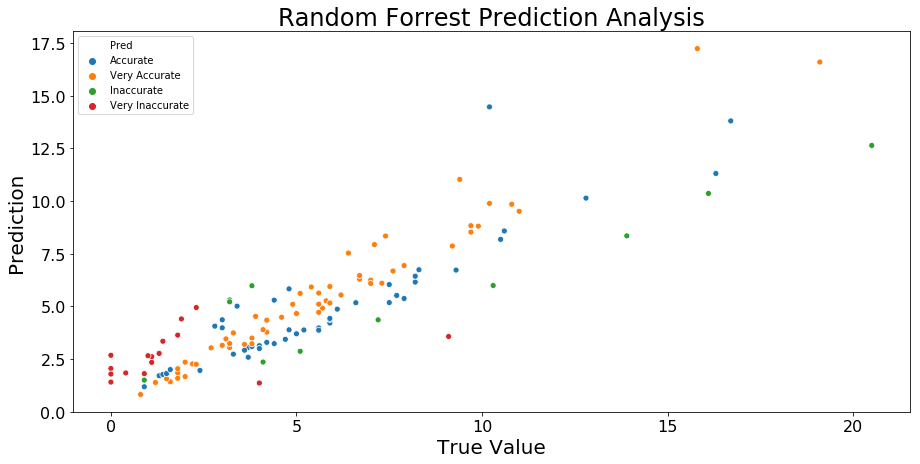

This model is able to relatively accurately predict 34.81% of NBA Rookies.
This model is able to very accurately predict 42.22% of NBA Rookies.


In [29]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Random Forrest Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
# plt.savefig('../../static/images/random_forrest_prediction.png')
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


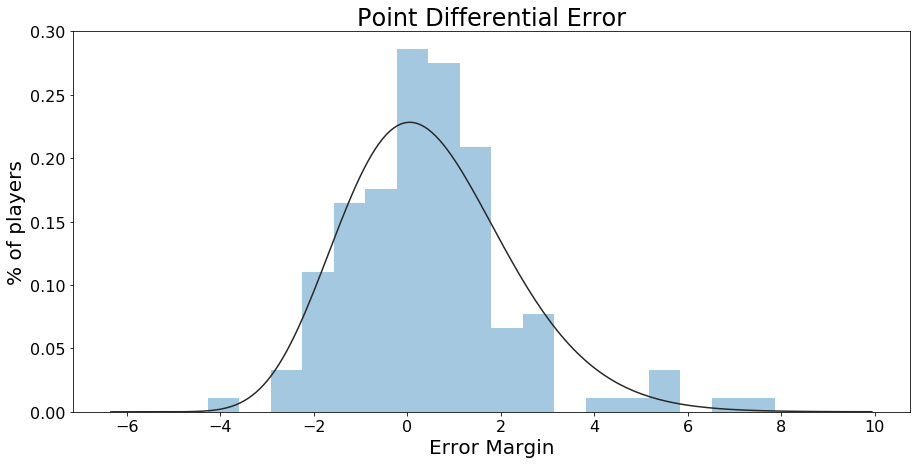

This model is able to relatively accurately predict 79.26% of NBA Rookies within 2 points.


In [30]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

In [31]:
cvs = cross_val_score(reg, cross_x, cross_y.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))

The Cross Validation Score is 76.87


# XGBoost

In [32]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=1000, max_depth=4, reg_lambda=.48, gamma=.3, booster='gblinear')
reg.fit(train_x.values, train_y.NBAPTS.values)

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost-1.0.0_snapshot-py3.7.egg\xgboost\core.py:611: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.3,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=0.48, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

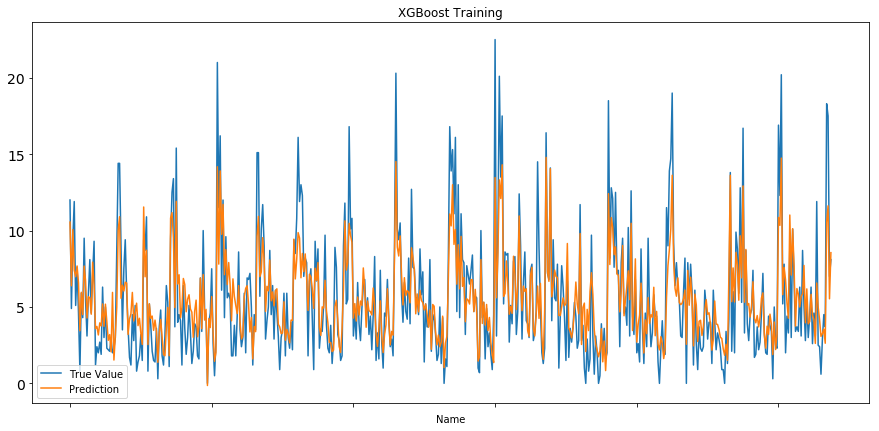

adj train r^2 = 0.7050647653879235
train mse = 4.572370645294492


In [33]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

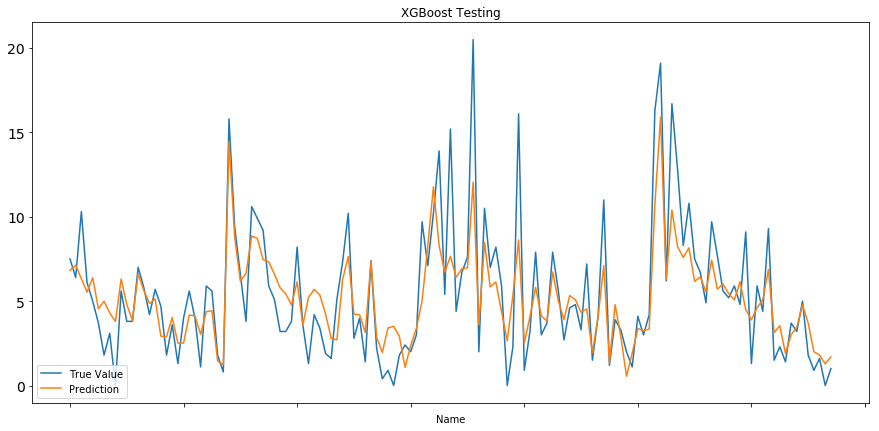

adj test r^2 = 0.6777604187284263
test mse = 4.947327655638839


In [34]:
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

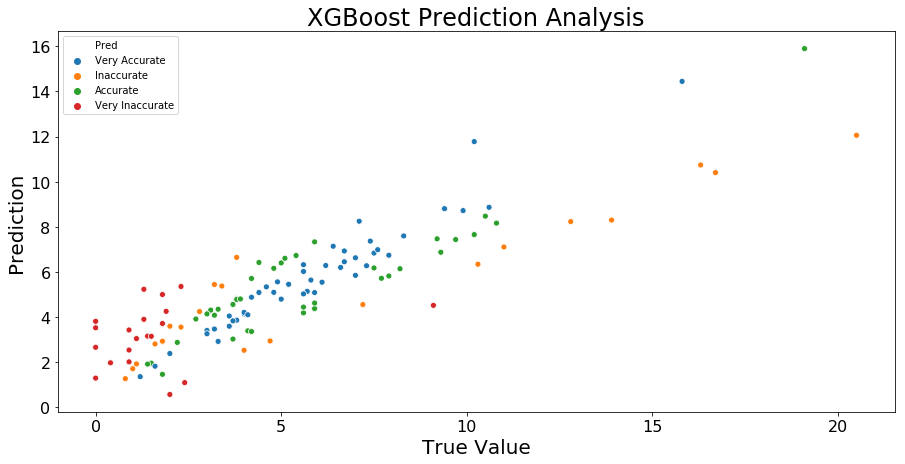

This model is able to relatively accurately predict 29.63% of NBA Rookies.
This model is able to very accurately predict 34.81% of NBA Rookies.


In [35]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("XGBoost Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


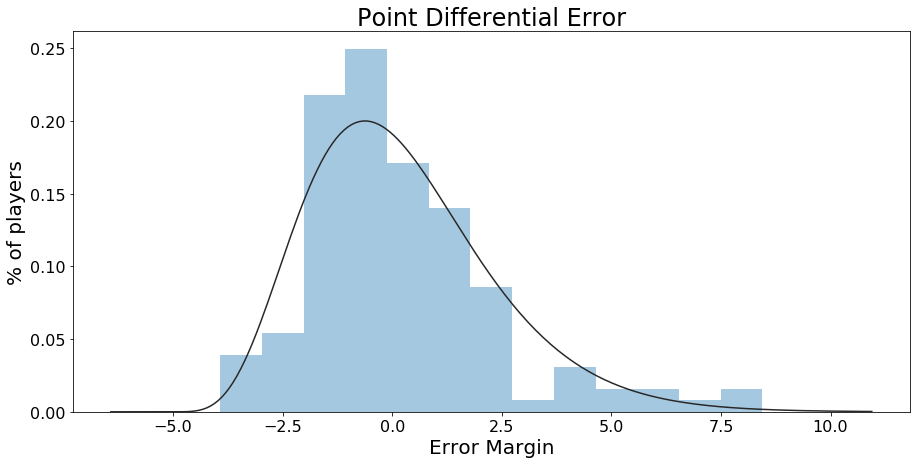

This model is able to relatively accurately predict 74.07% of NBA Rookies within 2 points.


In [36]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

In [37]:
cvs = cross_val_score(reg, cross_x, cross_y.NBAPTS, cv=5, scoring='r2')
print('The Cross Validation Score is ' + str(round(100*np.mean(cvs),2)))

The Cross Validation Score is 69.93


# Neural Network

In [38]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

Using TensorFlow backend.


In [40]:
K.clear_session()
model = Sequential()
model.add(Dense(128, input_dim=30, activation='tanh',kernel_regularizer=regularizers.l2(0.23)))
model.add(Dense(64, activation='tanh',kernel_regularizer=regularizers.l2(0.13)))
model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=True)
out = model.fit(train_x.values, train_y.NBAPTS.values, validation_data=[test_x.values, test_y['NBAPTS'].values.ravel()], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])

Instructions for updating:
Use tf.cast instead.


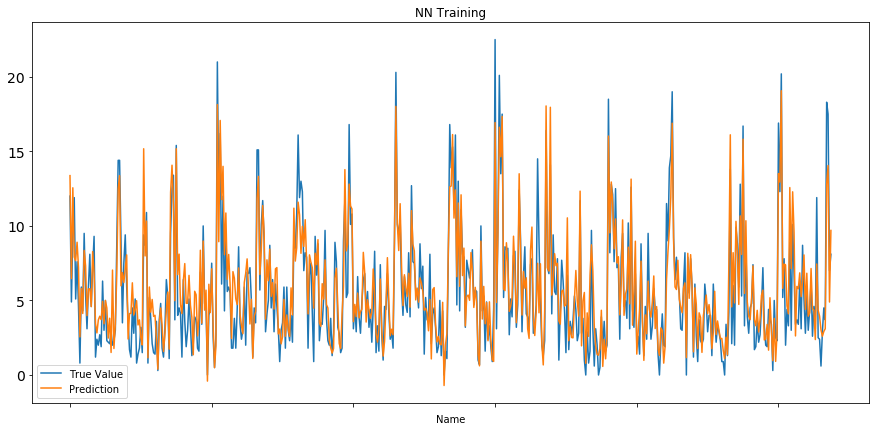

adj train r^2 = 0.7820938136048201
train mse = 3.3781920000567944


In [41]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

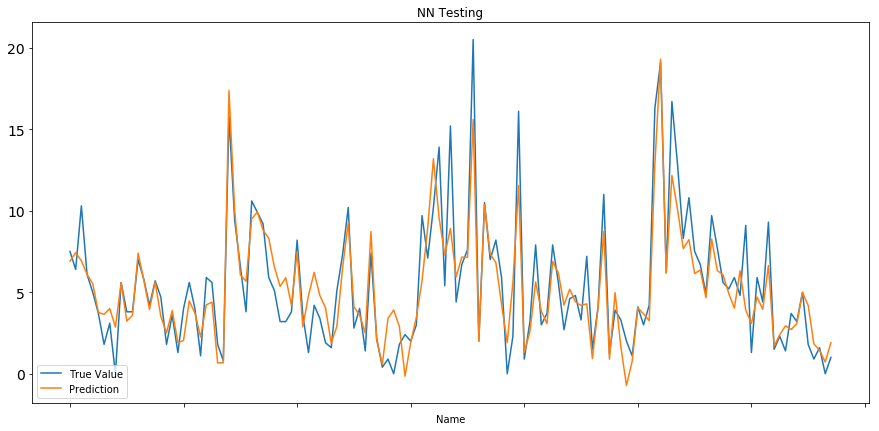

adj test r^2 = 0.7886940451405748
test mse = 3.244169416283393


In [42]:
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

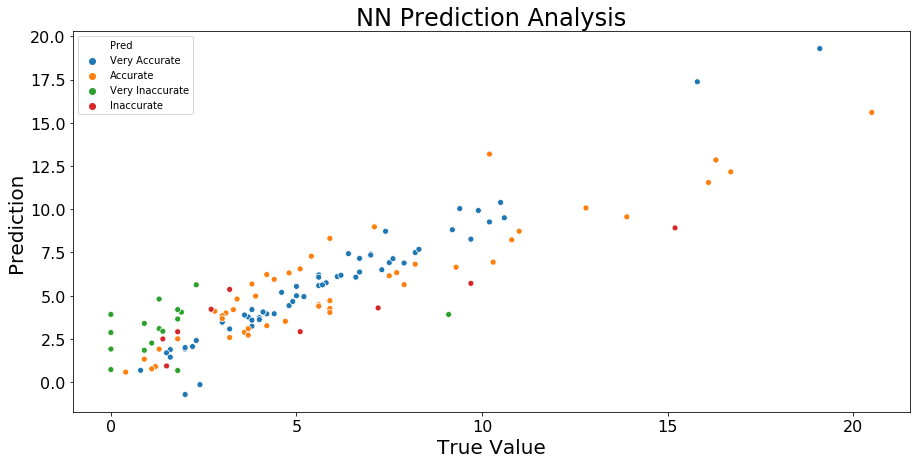

This model is able to relatively accurately predict 35.56% of NBA Rookies.
This model is able to very accurately predict 42.96% of NBA Rookies.


In [43]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("NN Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


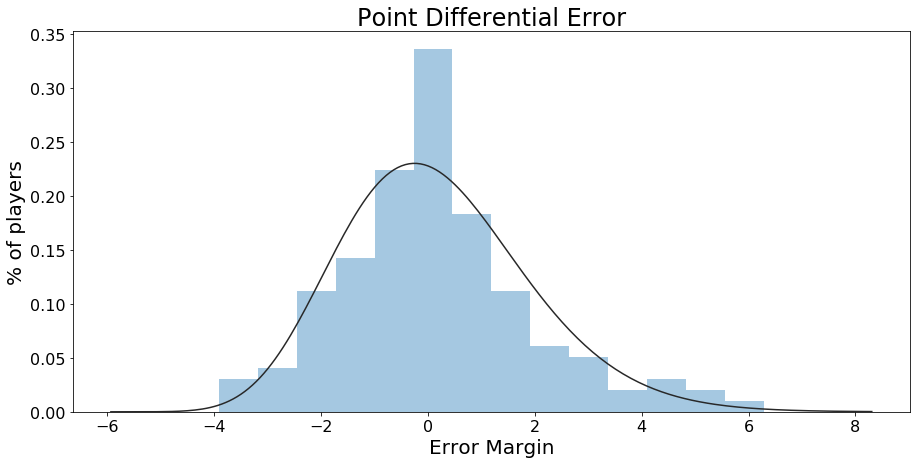

This model is able to relatively accurately predict 77.78% of NBA Rookies within 2 points.


In [44]:
test_y2['chip'] = (test_y2['NBAPTS'] - test_y2['prediction'])
fig, ax1 = plt.subplots(figsize=(15, 7))
x = test_y2['chip'].values
ax = sns.distplot(x, kde=False, fit=stats.gamma);
ax.set_title("Point Differential Error", fontsize=24)
ax.set_xlabel("Error Margin",fontsize=20)
ax.set_ylabel("% of players",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[abs(test_y2['chip'])<=2])/len(test_y2),2)) + "% of NBA Rookies within 2 points.")

In [45]:
from keras import backend as K

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [46]:
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

X = cross_x.values
Y = cross_y.NBAPTS.values
seed = 10
np.random.seed(seed)
kfold = KFold(n_splits=5, shuffle=False, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
    K.clear_session()
    model = Sequential()
    model.add(Dense(128, input_dim=30, activation='tanh',kernel_regularizer=regularizers.l2(0.23)))
    #model.add(Dropout(0.2))
    model.add(Dense(64, activation='tanh',kernel_regularizer=regularizers.l2(0.13)))
    model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='Adam', loss='mean_squared_error', metrics=[r2_keras])
    early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=False)
    out = model.fit(X[train], Y[train], validation_data=[X[test], Y[test]], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])
    scores = model.evaluate(X[test], Y[test], verbose=0)
    cvscores.append(scores[1])
print('The Cross Validation Score is ' + str(round(100*np.mean(cvscores),2)))

The Cross Validation Score is 76.43


# Chip Calculation

In [47]:
test_y2['chip'] = abs(test_y2['NBAPTS'] - test_y2['prediction'])
test_y2.sort_values('chip', ascending=True).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred,chip
Name,,,,,,,,
Trey Lyles,0.669424,-0.316669,-0.419507,-0.259160,6.1,6.099608,Very Accurate,0.000392
Justin Patton,-1.280781,-0.840042,1.407565,-0.847082,2.0,1.994709,Very Accurate,0.005291
Keita Bates-Diop,0.195050,-0.391436,0.363524,0.622722,5.0,4.988986,Very Accurate,0.011014
Mohamed Bamba,1.354631,-0.241901,-0.419507,3.268370,6.2,6.177498,Very Accurate,0.022502
Jerian Grant,-0.279324,0.879613,0.624534,-0.553121,5.6,5.576874,Very Accurate,0.023126


In [48]:
test_y2['chip'] = abs(test_y2['NBAPTS'] - test_y2['prediction'])
test_y2.sort_values('chip', ascending=False).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred,chip
Name,,,,,,,,
Lauri Markkanen,2.672337,0.057169,0.363524,0.916683,15.2,8.918076,Inaccurate,6.281924
Landry Shamet,-0.384741,0.281472,0.102514,-0.553121,9.1,3.910436,Very Inaccurate,5.189564
Donovan Mitchell,0.669424,1.926359,2.712616,0.034800,20.5,15.598115,Accurate,4.901885
Kyle Kuzma,2.039838,0.505775,0.363524,0.328761,16.1,11.542806,Accurate,4.557194
Collin Sexton,0.247758,1.402986,0.102514,-0.553121,16.7,12.158855,Accurate,4.541145


# Rookie Predictions

In [49]:
train=df3
test=df4
trains = np.split(train, [30], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [30], axis=1)
test_x=tests[0]
test_y=tests[1]

In [50]:
test_y.head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Zion Williamson,-1.280781,-0.840042,-1.202537,-0.847082,-1.251227
Ja Morant,-1.280781,-0.840042,-1.202537,-0.847082,-1.251227
RJ Barrett,-1.280781,-0.840042,-1.202537,-0.847082,-1.251227
DeAndre Hunter,-1.280781,-0.840042,-1.202537,-0.847082,-1.251227
Darius Garland,-1.280781,-0.840042,-1.202537,-0.847082,-1.251227


In [51]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    model = LinearRegression()
    rfe = RFE(model, 29)
    reg = rfe.fit(train_x.values, train_y[col].values)
    cols = []
    co = df3.columns
    for colo in co:
        cols = cols + [colo]
    picks = []
    for x in range(0,30):
        if reg.support_[x]:
            picks.append(cols[x])
    train_x3 = train_x[picks]
    test_x3 = test_x[picks]
    K.clear_session()
    model = RandomForestRegressor(n_estimators=1000).fit(train_x3.values, train_y[col].values.ravel())
    test_y2[col] = scalar.inverse_transform(model.predict(test_x3.values))

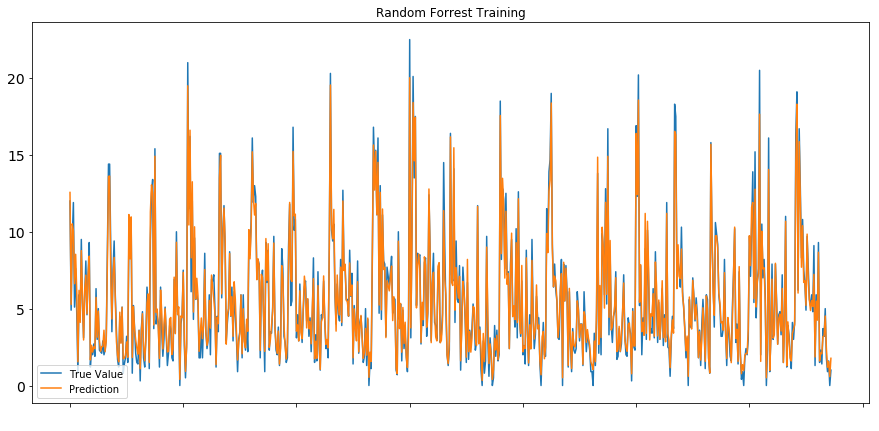

adj train r^2 = 0.9692206106918207
train mse = 0.4820300826597318


In [52]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x3.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.xlabel(" ")
plt.savefig('../../static/images/rf_train_prediction.png')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

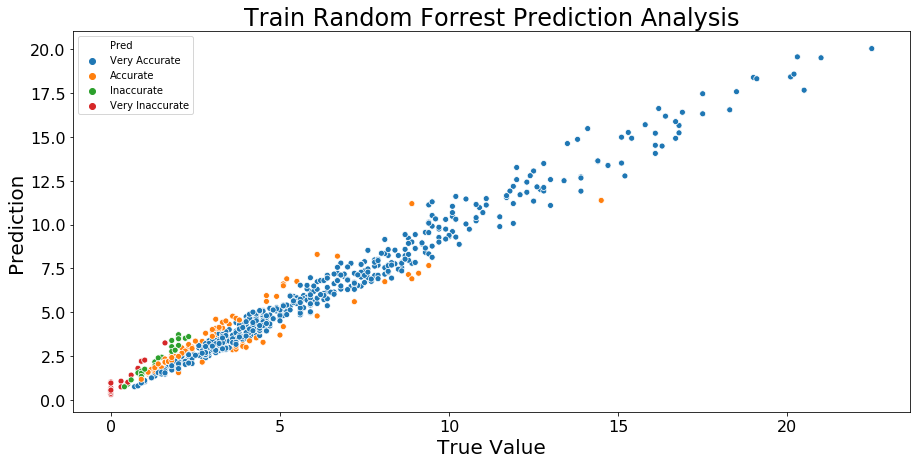

This model should be able to relatively accurately predict 15.16% of NBA Rookies.
This model should be able to very accurately predict 78.31% of NBA Rookies.


In [53]:
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 2, 'Pred'] = 'Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=train_y2)
ax.set_title("Train Random Forrest Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.savefig('../../static/images/rf_prediction_analysis.png')
plt.show()
print ("This model should be able to relatively accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")
print ("This model should be able to very accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Very Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")

# Prediction Results

In [54]:
test_y2 = test_y2.loc[~test_y2.index.duplicated(keep='first')]
test_y2

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Zion Williamson,3.6183,0.2479,0.4766,0.3723,2.4024
Ja Morant,1.6931,1.2044,0.3309,0.1864,2.2018
RJ Barrett,2.2008,0.3955,0.1459,0.1630,2.2908
DeAndre Hunter,2.2873,0.2187,0.1565,0.2057,1.5059
Darius Garland,2.0316,0.4172,0.1678,0.1643,1.7489
Jarrett Culver,1.9854,0.3219,0.2358,0.1310,2.2605
Coby White,1.7191,0.5423,0.1599,0.1595,1.7939
Jaxson Hayes,2.4994,0.1660,0.3915,0.3333,1.7238
Rui Hachimura,1.9324,0.1792,0.1219,0.1436,1.7360


In [55]:
test_y2['Value'] = 1*test_y2['NBAPTS'] + 1.2*test_y2['NBATRB'] + 1.5*test_y2['NBAAST'] + 3*test_y2['NBASTL'] + 3*test_y2['NBABLK']
test_y2.sort_values('Value', ascending=False)

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value
Name,,,,,,
Zion Williamson,3.6183,0.2479,0.4766,0.3723,2.4024,9.66291
Ja Morant,1.6931,1.2044,0.3309,0.1864,2.2018,7.59202
Jaxson Hayes,2.4994,0.1660,0.3915,0.3333,1.7238,7.14648
Brandon Clarke,1.9118,0.2427,0.3674,0.2820,2.2778,6.88421
RJ Barrett,2.2008,0.3955,0.1459,0.1630,2.2908,6.45171
Nickeil Alexander-Walker,1.9536,0.3754,0.3350,0.0804,2.1707,6.32432
Jordan Bone,1.4829,0.9340,0.2822,0.0757,2.0620,6.31618
Jarrett Culver,1.9854,0.3219,0.2358,0.1310,2.2605,6.22623
Darius Garland,2.0316,0.4172,0.1678,0.1643,1.7489,5.80892


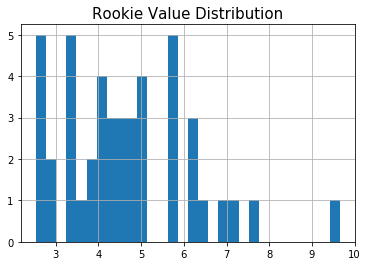

In [56]:
hist = test_y2['Value'].hist(bins=30)
plt.title("Rookie Value Distribution", fontsize=15)
plt.savefig('../../static/images/rookie_value_distribution.png')
plt.show()

In [57]:
test_y2 = test_y2.round(2)
test_y2 = test_y2.sort_index(axis = 0) 
test_y2.tail()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value
Name,,,,,,
Terance Mann,0.65,0.32,0.09,0.11,0.79,2.65
Ty Jerome,0.72,0.88,0.26,0.07,1.31,4.49
Tyler Cook,1.10,0.15,0.09,0.12,1.10,3.28
Tyler Herro,1.05,0.35,0.17,0.11,1.65,4.27
Zion Williamson,3.62,0.25,0.48,0.37,2.40,9.66


In [58]:
test_y2.to_csv('../NewRookiePredictions_NBATOV.csv')